<H1><center>pymgal example</center></H1>

In [1]:
import pymgal  # import the model -- install requirements, numpy, astropy, pyfits, scipy
import numpy as np
import matplotlib
%matplotlib inline
import pylab as pl

## import SSP models

In [2]:
mm=pymgal.SSP_models("bc03_ssp", metal=[0.008],nsample=1000)

Searching SSP model files, found: /home/weiguang/.local/lib/python3.5/site-packages/pymgal-1.0.0-py3.5.egg/pymgal/models/bc03_ssp_z_0.008_chab.model


## load simulation data

In [3]:
simd=pymgal.load_data(snapname="/home/weiguang/Downloads/snap_127",snapshot=True,
                      center=[500000,500000,500000], radius=250)

### define projection direction and pixel size

In [4]:
simd.rotate_grid(axis='z',nx=128)

## load filters

In [7]:
filters = pymgal.filters(f_name="sloan_r")

## Dust function before get seds

In [8]:
dustf=pymgal.dusts.charlot_fall()

## Now get seds

In [12]:
seds=mm.get_seds(simd,dust_func=dustf)
seds_nodust = mm.get_seds(simd)

## calculate mag

In [10]:
mag = filters.calc_mag(mm.vs['0.008'],seds,z=0.1)

/home/weiguang/.local/lib/python3.5/site-packages/pymgal-1.0.0-py3.5.egg/pymgal/filters.py:274: RuntimeWarning: divide by zero encountered in log10
  np.log10(sed_flux / self.ab_flux[i]) + app + to_vega


In [13]:
mag_nodust = filters.calc_mag(mm.vs['0.008'],seds_nodust,z=0.1)

/home/weiguang/.local/lib/python3.5/site-packages/pymgal-1.0.0-py3.5.egg/pymgal/filters.py:274: RuntimeWarning: divide by zero encountered in log10
  np.log10(sed_flux / self.ab_flux[i]) + app + to_vega


In [17]:
print(mag['sloan_r'].shape, mag_nodust['sloan_r'].shape)

(128, 128) (128, 128)


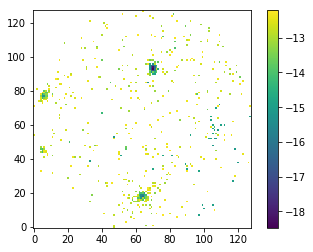

In [21]:
pl.imshow(mag['sloan_r'].T,origin='lower')
pl.colorbar()

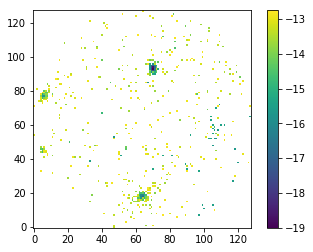

In [23]:
pl.imshow(mag_nodust['sloan_r'].T,origin='lower')
pl.colorbar()

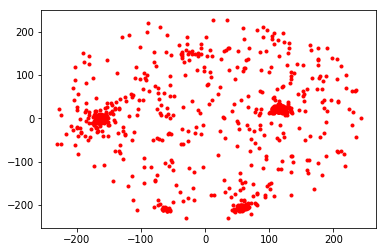

In [22]:
pl.plot(simd.S_pos[:,0],simd.S_pos[:,1],'r.')

In [ ]:
pl.scatter(simd.S_pos[:,0],simd.S_pos[:,1],s=4,c=mag['sloan_r'])
pl.colorbar()

In [ ]:
mm2=pymgal.SSP_models("bc03_ssp", metal=[0.008])

In [ ]:
pl.scatter(simd.S_pos[:,0],simd.S_pos[:,1],s=4,c=mag_nodust['sloan_r'])
pl.colorbar()